# Car Price Prediction


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset=pd.read_csv('CarPrice.csv')


In [3]:
car_dataset.head(6) #.tail() for last5 entries

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,2,audi fox,gas,std,2,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [4]:
car_dataset.shape

(205, 25)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
#checking missing values
car_dataset.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# replace missing values if present
#checking the distribution of categorial data
print(car_dataset.CarName.value_counts())

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64


In [8]:
print(car_dataset.aspiration.value_counts())

aspiration
std      168
turbo     37
Name: count, dtype: int64


In [9]:
print(car_dataset.carbody.value_counts())

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


In [10]:
print(car_dataset.CarName)

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object


In [11]:
print(car_dataset.enginelocation.value_counts())

enginelocation
front    202
rear       3
Name: count, dtype: int64


In [12]:
print(car_dataset.drivewheel.value_counts())

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


In [13]:
print(car_dataset.fuelsystem.value_counts())

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


In [14]:
print(car_dataset.enginetype.value_counts())

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


In [15]:
#encoding categorical data
car_dataset.replace({'fueltype':{'gas':0,'diesel':1,'petrol':2}},inplace=True)
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)
car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
car_dataset.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)
car_dataset.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

In [16]:
car_dataset.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,2,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,168.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,171.2,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,0,0,4,0,0,0,99.8,176.6,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,0,0,4,0,2,0,99.4,176.6,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
#splitting data into training and test data
X=car_dataset.drop(['price','CarName'],axis=1)
Y=car_dataset['price']


In [18]:
print(X)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            3         0           0           2        4           1   
1            3         0           0           2        4           1   
2            1         0           0           2        1           1   
3            2         0           0           4        0           0   
4            2         0           0           4        0           2   
..         ...       ...         ...         ...      ...         ...   
200         -1         0           0           4        0           1   
201         -1         0           1           4        0           1   
202         -1         0           0           4        0           1   
203         -1         1           1           4        0           1   
204         -1         0           1           4        0           1   

     enginelocation  wheelbase  carlength  carwidth  ...  cylindernumber  \
0                 0       88.6      168.8      

In [19]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=2)

In [21]:
#linear regression loading
lin_reg_model=LinearRegression()

In [22]:
#fit is used to train our model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [23]:
#model evaluation
#prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [24]:
r_sq=metrics.r2_score(Y_train,training_data_prediction)


In [25]:
print(r_sq)

0.9203855351679353


In [26]:
lin_reg_model.fit(X,Y)

LinearRegression()

In [27]:
Y_predict=lin_reg_model.predict(X)
print(Y_predict)

[11922.1024882  11922.1024882  17848.52598773 11807.04853659
 18224.28902892 14652.22480134 19546.7029492  19490.64036488
 19849.53532809 20133.80357222 13385.61485732 13113.6515958
 15747.85955531 16022.36459748 17724.42492663 26682.50910739
 27091.76804881 31107.73310139 -1504.2027306   6460.21051454
  6336.18691606  6157.420349    6603.15616477  8228.42468603
  6925.14507136  7071.613791    7071.613791    8430.06801213
 10444.35537772 14838.31091159  3990.53715949  7540.07378582
  5823.20782081  8265.71128091  8290.32165545  7951.565784
  8302.26667968  9665.6406661   9747.16253176  9424.76540316
  7206.71757912 10114.66976345 10597.78532482  6341.97255264
  6572.83996918  6585.64697257 11176.24009177 32251.99886323
 32251.99886323 40861.88235821  5226.10136851  6054.76163405
  6062.4523761   5764.15518637  5514.94066206  8189.84234552
  8189.84234552  8197.53308757 11468.81348739 10233.48587405
 10414.54615263 10233.48587405 10414.54615263 12051.28581067
 10324.98892412 17080.87943

In [28]:
result={"Actual Price":Y,"Predicted Price":Y_predict}
pd.DataFrame(result).to_csv("Result.csv")

In [29]:
data=pd.read_csv('Result.csv')

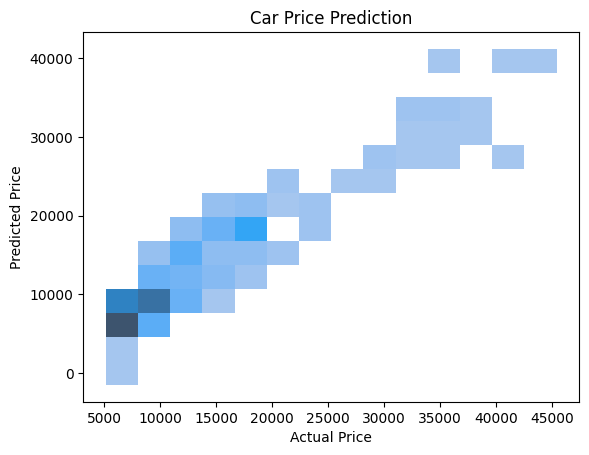

In [30]:
plt.title("Car Price Prediction")
sns.histplot(x="Actual Price",y="Predicted Price",data=data)
plt.show()

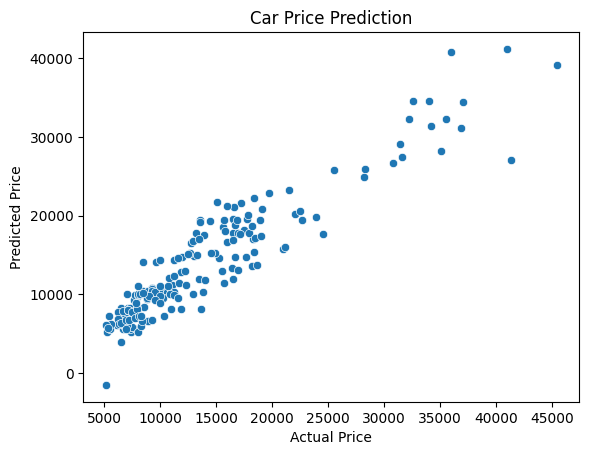

In [31]:
plt.title("Car Price Prediction")
sns.scatterplot(x="Actual Price",y="Predicted Price",data=data)
plt.show()